Individual speech classification attmepts to use machine learning algorithm to classify two different speeches from two individuals.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pandas as pd
from scipy.io import wavfile
import tensorflow as tf

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

Function for timestamp.

In [ ]:
def timestamp():
    return datetime.today()
    #return datetime.today().strftime('%m/%d/%Y %H:%M:%S')

Function for converting sound data into pandas dataframe

In [ ]:
def soundToDataFrame(soundFile,targetValue):

    startTime = timestamp()
    #print(startTime)
    
    wav_file_name = soundFile
    
    # analyze audio data
    sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
    
    # Show some basic information about the audio.
    duration = len(wav_data)/sample_rate
    print(f'Sample rate: {sample_rate} Hz')
    print(f'Total duration: {duration:.2f}s')
    print(f'Size of the input: {len(wav_data)}')
    
    waveform = wav_data / tf.int16.max
    
    xlower = 0
    xupper = len(wav_data)
    
    plt.figure(figsize=(15, 40))
    
    # Plot the waveform.
    plt.subplot(3, 1, 1)
    plt.plot(waveform)
    #plt.xlim([0, len(waveform)])
    plt.xlim([xlower,xupper])
    #plt.yticks(np.arange(0, 0.5, step=0.03))
    plt.grid(axis='y')
    
    print(waveform.shape)
    
    #print(waveform[0])
    #print(waveform[0][0])
    #print(waveform[0][1])
    
    cutOffNo = 5000 #cut the row to 5000 times 2 (10000) features per row
    temp_waveform = [] #creates an empty list
    df_temp2 = pd.DataFrame() #creates an empty dataframe
    i2 = 0 #count for creating a row after reaching the cutOffNo
    for i in range(len(waveform)):
        temp_waveform.append(waveform[i][0])
        temp_waveform.append(waveform[i][1])
        i2 += 1
        if i2 == cutOffNo:
            df_temp = pd.DataFrame(temp_waveform)
            df_temp = df_temp.T #transpose the list of wavelength into rows
            df_temp2 = df_temp2.append(df_temp)
            i2 = 0
            temp_waveform = []
            
    del waveform
    del temp_waveform
    #del temp_df
    #del temp2_df
    #print(temp3_df)
    endTime = timestamp()

    print("Start Time:",startTime)
    print("End Time:",endTime)
    print("Total time:", endTime - startTime)

    return df_temp2

Converting sound data to dataframe for the first file

Sample rate: 44100 Hz
Total duration: 623.41s
Size of the input: 27492399
(27492399, 2)
Start Time: 2021-11-17 00:58:53.592566
End Time: 2021-11-17 01:05:48.617152
Total time: 0:06:55.024586


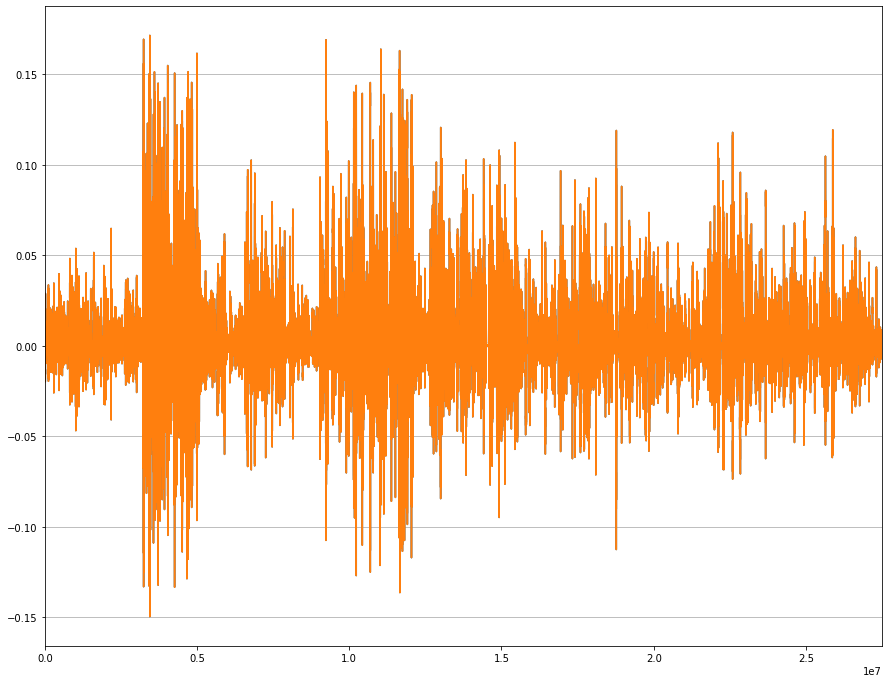

In [ ]:
df1 = pd.DataFrame()
df1 = df1.append(soundToDataFrame("/content/mf001.wav","P1"))
df1 = df1.reset_index(drop=True)
df1[10000] = "P1"

Displaying dataframe of person 1 sound data

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,0.000000,0.000000,0.000000,0.000000,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,...,0.001862,0.002960,0.002960,0.004028,0.004028,0.004913,0.004913,0.005799,0.005799,0.006439,0.006439,0.007080,0.007080,0.007569,0.007569,0.007935,0.007935,0.008301,0.008301,0.008362,0.008362,0.008637,0.008637,0.008606,0.008606,0.008698,0.008698,0.008728,0.008728,0.008637,0.008637,0.008667,0.008667,0.008606,0.008606,0.008637,0.008637,0.008606,0.008606,P1
1,0.008667,0.008667,0.008698,0.008698,0.008789,0.008789,0.008759,0.008759,0.008911,0.008911,0.008942,0.008942,0.009003,0.009003,0.009156,0.009156,0.009033,0.009033,0.009186,0.009186,0.009095,0.009095,0.009003,0.009003,0.008881,0.008881,0.008606,0.008606,0.008362,0.008362,0.007935,0.007935,0.007385,0.007385,0.006745,0.006745,0.006043,0.006043,0.005188,0.005188,...,-0.000855,-0.000855,-0.000855,-0.000977,-0.000977,-0.000916,-0.000916,-0.001068,-0.001068,-0.001129,-0.001129,-0.001282,-0.001282,-0.001434,-0.001434,-0.001587,-0.001587,-0.001831,-0.001831,-0.001984,-0.001984,-0.002228,-0.002228,-0.002380,-0.002380,-0.002564,-0.002564,-0.002747,-0.002747,-0.002930,-0.002930,-0.002991,-0.002991,-0.003174,-0.003174,-0.003143,-0.003143,-0.003204,-0.003204,P1
2,-0.003327,-0.003327,-0.003113,-0.003113,-0.003265,-0.003265,-0.003052,-0.003052,-0.002960,-0.002960,-0.002899,-0.002899,-0.002625,-0.002625,-0.002564,-0.002564,-0.002350,-0.002350,-0.002197,-0.002197,-0.002014,-0.002014,-0.001801,-0.001801,-0.001648,-0.001648,-0.001434,-0.001434,-0.001312,-0.001312,-0.001099,-0.001099,-0.000946,-0.000946,-0.000763,-0.000763,-0.000549,-0.000549,-0.000366,-0.000366,...,0.001801,0.001801,0.001801,0.001587,0.001587,0.001526,0.001526,0.001434,0.001434,0.001221,0.001221,0.001221,0.001221,0.000977,0.000977,0.000855,0.000855,0.000671,0.000671,0.000549,0.000549,0.000336,0.000336,0.000183,0.000183,0.000031,0.000031,-0.000183,-0.000183,-0.000275,-0.000275,-0.000580,-0.000580,-0.000732,-0.000732,-0.001007,-0.001007,-0.001312,-0.001312,P1
3,-0.001556,-0.001556,-0.002014,-0.002014,-0.002380,-0.002380,-0.002838,-0.002838,-0.003388,-0.003388,-0.003906,-0.003906,-0.004517,-0.004517,-0.005188,-0.005188,-0.005860,-0.005860,-0.006531,-0.006531,-0.007263,-0.007263,-0.008026,-0.008026,-0.008789,-0.008789,-0.009583,-0.009583,-0.010376,-0.010376,-0.011231,-0.011231,-0.012055,-0.012055,-0.012818,-0.012818,-0.013642,-0.013642,-0.014374,-0.014374,...,0.023041,0.021241,0.021241,0.019410,0.019410,0.017762,0.017762,0.016388,0.016388,0.015381,0.015381,0.014496,0.014496,0.013825,0.013825,0.013001,0.013001,0.012146,0.012146,0.011078,0.011078,0.009827,0.009827,0.008606,0.008606,0.007294,0.007294,0.006348,0.006348,0.005615,0.005615,0.005249,0.005249,0.005341,0.005341,0.005646,0.005646,0.006104,0.006104,P1
4,0.006561,0.006561,0.006806,0.006806,0.006684,0.006684,0.006165,0.006165,0.005249,0.005249,0.003906,0.003906,0.002380,0.002380,0.000793,0.000793,-0.000763,-0.000763,-0.001953,-0.001953,-0.002899,-0.002899,-0.003357,-0.003357,-0.003571,-0.003571,-0.003357,-0.003357,-0.002991,-0.002991,-0.002472,-0.002472,-0.001862,-0.001862,-0.001373,-0.001373,-0.000855,-0.000855,-0.000305,-0.000305,...,-0.004486,-0.004730,-0.004730,-0.004791,-0.004791,-0.004913,-0.004913,-0.005066,-0.005066,-0.005036,-0.005036,-0.005127,-0.005127,-0.005127,-0.005127,-0.005097,-0.005097,-0.005036,-0.005036,-0.004975,-0.004975,-0.004913,-0.004913,-0.004822,-0.004822,-0.004730,-0.0047

Converting sound data to dataframe for the second file

Sample rate: 44100 Hz
Total duration: 594.24s
Size of the input: 26206024
(26206024, 2)
Start Time: 2021-11-17 01:06:35.425555
End Time: 2021-11-17 01:12:20.821353
Total time: 0:05:45.395798


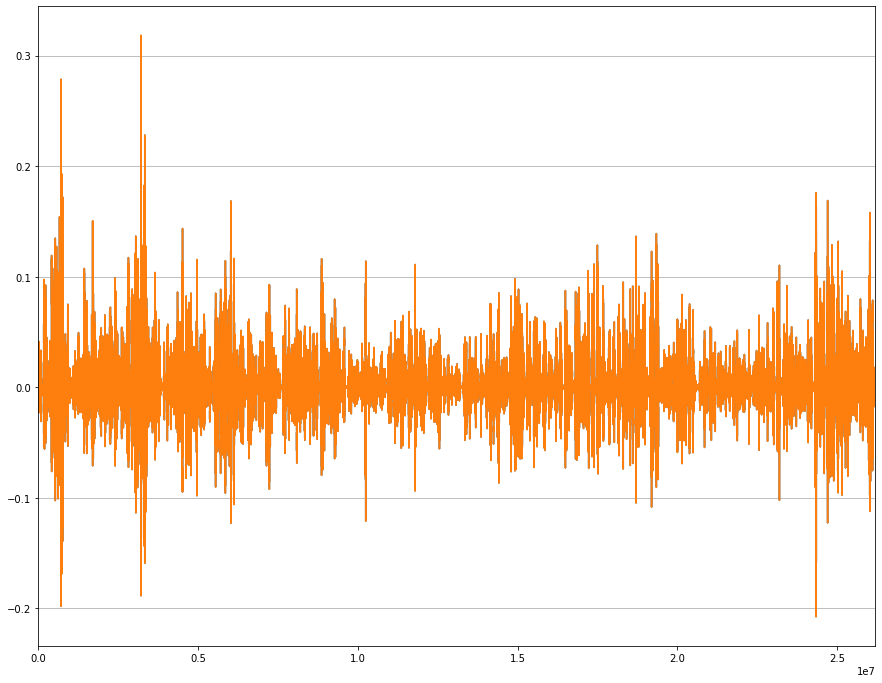

In [ ]:
df2 = pd.DataFrame()
df2 = df2.append(soundToDataFrame("/content/mz001.wav","P2"))
df2 = df2.reset_index(drop=True)
df2[10000] = "P2"

Displaying dataframe of person 2 sound data

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,-0.000061,-0.000061,-0.000031,-0.000031,-0.000092,-0.000092,-0.000031,-0.000031,-0.000092,-0.000092,-0.000031,-0.000031,-0.000031,-0.000031,...,0.000397,0.000397,0.000397,0.000305,0.000305,0.000336,0.000336,0.000214,0.000214,0.000183,0.000183,0.000000,0.000000,-0.000061,-0.000061,-0.000214,-0.000214,-0.000244,-0.000244,-0.000275,-0.000275,-0.000397,-0.000397,-0.000305,-0.000305,-0.000336,-0.000336,-0.000244,-0.000244,-0.000183,-0.000183,-0.000122,-0.000122,-0.000031,-0.000031,-0.000031,-0.000031,0.000153,0.000153,P2
1,0.000122,0.000122,0.000183,0.000183,0.000275,0.000275,0.000275,0.000275,0.000366,0.000366,0.000427,0.000427,0.000427,0.000427,0.000580,0.000580,0.000580,0.000580,0.000610,0.000610,0.000702,0.000702,0.000641,0.000641,0.000702,0.000702,0.000641,0.000641,0.000641,0.000641,0.000549,0.000549,0.000488,0.000488,0.000366,0.000366,0.000244,0.000244,0.000183,0.000183,...,-0.000122,-0.000244,-0.000244,-0.000122,-0.000122,-0.000122,-0.000122,-0.000031,-0.000031,0.000122,0.000122,0.000122,0.000122,0.000336,0.000336,0.000336,0.000336,0.000458,0.000458,0.000488,0.000488,0.000549,0.000549,0.000580,0.000580,0.000580,0.000580,0.000641,0.000641,0.000549,0.000549,0.000610,0.000610,0.000519,0.000519,0.000458,0.000458,0.000427,0.000427,P2
2,0.000275,0.000275,0.000275,0.000275,0.000183,0.000183,0.000153,0.000153,0.000122,0.000122,0.000122,0.000122,0.000244,0.000244,0.000183,0.000183,0.000366,0.000366,0.000427,0.000427,0.000519,0.000519,0.000702,0.000702,0.000641,0.000641,0.000763,0.000763,0.000671,0.000671,0.000702,0.000702,0.000641,0.000641,0.000549,0.000549,0.000580,0.000580,0.000427,0.000427,...,-0.000488,-0.000549,-0.000549,-0.000488,-0.000488,-0.000488,-0.000488,-0.000397,-0.000397,-0.000275,-0.000275,-0.000214,-0.000214,-0.000122,-0.000122,0.000000,0.000000,0.000031,0.000031,0.000183,0.000183,0.000153,0.000153,0.000183,0.000183,0.000153,0.000153,0.000122,0.000122,0.000031,0.000031,-0.000061,-0.000061,-0.000092,-0.000092,-0.000244,-0.000244,-0.000244,-0.000244,P2
3,-0.000336,-0.000336,-0.000366,-0.000366,-0.000305,-0.000305,-0.000336,-0.000336,-0.000244,-0.000244,-0.000183,-0.000183,-0.000153,-0.000153,-0.000031,-0.000031,0.000031,0.000031,0.000153,0.000153,0.000244,0.000244,0.000305,0.000305,0.000397,0.000397,0.000427,0.000427,0.000549,0.000549,0.000580,0.000580,0.000610,0.000610,0.000671,0.000671,0.000641,0.000641,0.000702,0.000702,...,0.003082,0.002228,0.002228,0.001373,0.001373,0.000610,0.000610,-0.000244,-0.000244,-0.000885,-0.000885,-0.001495,-0.001495,-0.002014,-0.002014,-0.002472,-0.002472,-0.002838,-0.002838,-0.003174,-0.003174,-0.003418,-0.003418,-0.003601,-0.003601,-0.003723,-0.003723,-0.003784,-0.003784,-0.003815,-0.003815,-0.003632,-0.003632,-0.003479,-0.003479,-0.003082,-0.003082,-0.002777,-0.002777,P2
4,-0.002319,-0.002319,-0.001831,-0.001831,-0.001526,-0.001526,-0.001099,-0.001099,-0.000916,-0.000916,-0.000702,-0.000702,-0.000549,-0.000549,-0.000488,-0.000488,-0.000397,-0.000397,-0.000275,-0.000275,-0.000244,-0.000244,-0.000183,-0.000183,-0.000031,-0.000031,0.000000,0.000000,0.000122,0.000122,-0.000031,-0.000031,-0.000031,-0.000031,-0.000183,-0.000183,-0.000397,-0.000397,-0.000519,-0.000519,...,0.025300,0.023194,0.023194,0.020814,0.020814,0.018464,0.018464,0.016022,0.016022,0.013459,0.013459,0.011017,0.011017,0.008545,0.008545,0.006165,0.006165,0.003876,0.003876,0.001801,0.001801,-0.000122,-0.000122,-0.001801,-0.001801,-0.003204,-0.003204,-0.004425,-0.004425,-0.005402,-0.

Finding the total rows of each dataframe and use data up to the max of the least dataframe

In [ ]:
maxRow = 0
if len(df1) > len(df2):
  maxRow = len(df2)
else:
  maxRow = len(df1)
print(maxRow)

startRow = 1000
maxRow = 1500

print(startRow,maxRow)

5241
1000 1500


In [ ]:
df_final = pd.DataFrame()
df_final = df_final.append(df1[startRow:maxRow])

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
1000,0.029572,0.029572,0.031220,0.031220,0.032746,0.032746,0.034059,0.034059,0.034822,0.034822,0.035310,0.035310,0.035157,0.035157,0.034608,0.034608,0.033753,0.033753,0.032441,0.032441,0.031312,0.031312,0.030030,0.030030,0.029084,0.029084,0.028535,0.028535,0.028260,0.028260,0.028657,0.028657,0.029298,0.029298,0.030305,0.030305,0.031556,0.031556,0.032807,0.032807,...,0.016999,0.021485,0.021485,0.023316,0.023316,0.022889,0.022889,0.020386,0.020386,0.017151,0.017151,0.013916,0.013916,0.011902,0.011902,0.012116,0.012116,0.014588,0.014588,0.019776,0.019776,0.026704,0.026704,0.034730,0.034730,0.042482,0.042482,0.048982,0.048982,0.053163,0.053163,0.054537,0.054537,0.053011,0.053011,0.048921,0.048921,0.043336,0.043336,P1
1001,0.036744,0.036744,0.030610,0.030610,0.025300,0.025300,0.021638,0.021638,0.019562,0.019562,0.018891,0.018891,0.019349,0.019349,0.020081,0.020081,0.020966,0.020966,0.021241,0.021241,0.020936,0.020936,0.019868,0.019868,0.018311,0.018311,0.016236,0.016236,0.013947,0.013947,0.011597,0.011597,0.008881,0.008881,0.006104,0.006104,0.002838,0.002838,-0.000702,-0.000702,...,-0.000275,-0.000397,-0.000397,-0.000336,-0.000336,-0.000458,-0.000458,-0.000488,-0.000488,-0.000458,-0.000458,-0.000641,-0.000641,-0.000549,-0.000549,-0.000702,-0.000702,-0.000671,-0.000671,-0.000671,-0.000671,-0.000824,-0.000824,-0.000732,-0.000732,-0.000855,-0.000855,-0.000885,-0.000885,-0.000885,-0.000885,-0.001068,-0.001068,-0.000977,-0.000977,-0.001068,-0.001068,-0.001129,-0.001129,P1
1002,-0.001068,-0.001068,-0.001221,-0.001221,-0.001129,-0.001129,-0.001221,-0.001221,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001129,-0.001129,-0.001129,-0.001129,-0.001068,-0.001068,-0.001099,-0.001099,-0.001038,-0.001038,-0.001038,-0.001038,-0.001068,-0.001068,-0.001068,-0.001068,-0.001129,-0.001129,-0.001129,-0.001129,-0.001160,-0.001160,-0.001129,-0.001129,-0.001160,-0.001160,...,0.007843,0.007477,0.007477,0.007080,0.007080,0.006439,0.006439,0.005707,0.005707,0.004822,0.004822,0.003876,0.003876,0.002777,0.002777,0.001617,0.001617,0.000488,0.000488,-0.000702,-0.000702,-0.001801,-0.001801,-0.002869,-0.002869,-0.003937,-0.003937,-0.004761,-0.004761,-0.005554,-0.005554,-0.006226,-0.006226,-0.006714,-0.006714,-0.007141,-0.007141,-0.007263,-0.007263,P1
1003,-0.007416,-0.007416,-0.007294,-0.007294,-0.007080,-0.007080,-0.006775,-0.006775,-0.006287,-0.006287,-0.005829,-0.005829,-0.005188,-0.005188,-0.004608,-0.004608,-0.003876,-0.003876,-0.003204,-0.003204,-0.002472,-0.002472,-0.001679,-0.001679,-0.000946,-0.000946,-0.000153,-0.000153,0.000671,0.000671,0.001495,0.001495,0.002258,0.002258,0.003052,0.003052,0.003754,0.003754,0.004456,0.004456,...,-0.001648,-0.001770,-0.001770,-0.001801,-0.001801,-0.001892,-0.001892,-0.001923,-0.001923,-0.001953,-0.001953,-0.002014,-0.002014,-0.001953,-0.001953,-0.002045,-0.002045,-0.001953,-0.001953,-0.002014,-0.002014,-0.001953,-0.001953,-0.001953,-0.001953,-0.002014,-0.002014,-0.001892,-0.001892,-0.002045,-0.002045,-0.001953,-0.001953,-0.001984,-0.001984,-0.001953,-0.001953,-0.001892,-0.001892,P1
1004,-0.001953,-0.001953,-0.001892,-0.001892,-0.001892,-0.001892,-0.001831,-0.001831,-0.001892,-0.001892,-0.001862,-0.001862,-0.001831,-0.001831,-0.001892,-0.001892,-0.001801,-0.001801,-0.001801,-0.001801,-0.001740,-0.001740,-0.001648,-0.001648,-0.001617,-0.001617,-0.001495,-0.001495,-0.001434,-0.001434,-0.001343,-0.001343,-0.001282,-0.001282,-0.001221,-0.001221,-0.001099,-0.001099,-0.001099,-0.001099,...,-0.003571,-0.005280,-0.005280,-0.006561,-0.006561,-0.007355,-0.007355,-0.008148,-0.008148,-0.008545,-0.008545,-0.009156,-0.009156,-0.009766,-0.009766,-0.010437,-0.010437,-0.011353,-0.011353,-0.012116,-0.012116,-0.01

In [ ]:
df_final = df_final.append(df2[startRow:maxRow])

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
1000,0.029572,0.029572,0.031220,0.031220,0.032746,0.032746,0.034059,0.034059,0.034822,0.034822,0.035310,0.035310,0.035157,0.035157,0.034608,0.034608,0.033753,0.033753,0.032441,0.032441,0.031312,0.031312,0.030030,0.030030,0.029084,0.029084,0.028535,0.028535,0.028260,0.028260,0.028657,0.028657,0.029298,0.029298,0.030305,0.030305,0.031556,0.031556,0.032807,0.032807,...,0.016999,0.021485,0.021485,0.023316,0.023316,0.022889,0.022889,0.020386,0.020386,0.017151,0.017151,0.013916,0.013916,0.011902,0.011902,0.012116,0.012116,0.014588,0.014588,0.019776,0.019776,0.026704,0.026704,0.034730,0.034730,0.042482,0.042482,0.048982,0.048982,0.053163,0.053163,0.054537,0.054537,0.053011,0.053011,0.048921,0.048921,0.043336,0.043336,P1
1001,0.036744,0.036744,0.030610,0.030610,0.025300,0.025300,0.021638,0.021638,0.019562,0.019562,0.018891,0.018891,0.019349,0.019349,0.020081,0.020081,0.020966,0.020966,0.021241,0.021241,0.020936,0.020936,0.019868,0.019868,0.018311,0.018311,0.016236,0.016236,0.013947,0.013947,0.011597,0.011597,0.008881,0.008881,0.006104,0.006104,0.002838,0.002838,-0.000702,-0.000702,...,-0.000275,-0.000397,-0.000397,-0.000336,-0.000336,-0.000458,-0.000458,-0.000488,-0.000488,-0.000458,-0.000458,-0.000641,-0.000641,-0.000549,-0.000549,-0.000702,-0.000702,-0.000671,-0.000671,-0.000671,-0.000671,-0.000824,-0.000824,-0.000732,-0.000732,-0.000855,-0.000855,-0.000885,-0.000885,-0.000885,-0.000885,-0.001068,-0.001068,-0.000977,-0.000977,-0.001068,-0.001068,-0.001129,-0.001129,P1
1002,-0.001068,-0.001068,-0.001221,-0.001221,-0.001129,-0.001129,-0.001221,-0.001221,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001190,-0.001129,-0.001129,-0.001129,-0.001129,-0.001068,-0.001068,-0.001099,-0.001099,-0.001038,-0.001038,-0.001038,-0.001038,-0.001068,-0.001068,-0.001068,-0.001068,-0.001129,-0.001129,-0.001129,-0.001129,-0.001160,-0.001160,-0.001129,-0.001129,-0.001160,-0.001160,...,0.007843,0.007477,0.007477,0.007080,0.007080,0.006439,0.006439,0.005707,0.005707,0.004822,0.004822,0.003876,0.003876,0.002777,0.002777,0.001617,0.001617,0.000488,0.000488,-0.000702,-0.000702,-0.001801,-0.001801,-0.002869,-0.002869,-0.003937,-0.003937,-0.004761,-0.004761,-0.005554,-0.005554,-0.006226,-0.006226,-0.006714,-0.006714,-0.007141,-0.007141,-0.007263,-0.007263,P1
1003,-0.007416,-0.007416,-0.007294,-0.007294,-0.007080,-0.007080,-0.006775,-0.006775,-0.006287,-0.006287,-0.005829,-0.005829,-0.005188,-0.005188,-0.004608,-0.004608,-0.003876,-0.003876,-0.003204,-0.003204,-0.002472,-0.002472,-0.001679,-0.001679,-0.000946,-0.000946,-0.000153,-0.000153,0.000671,0.000671,0.001495,0.001495,0.002258,0.002258,0.003052,0.003052,0.003754,0.003754,0.004456,0.004456,...,-0.001648,-0.001770,-0.001770,-0.001801,-0.001801,-0.001892,-0.001892,-0.001923,-0.001923,-0.001953,-0.001953,-0.002014,-0.002014,-0.001953,-0.001953,-0.002045,-0.002045,-0.001953,-0.001953,-0.002014,-0.002014,-0.001953,-0.001953,-0.001953,-0.001953,-0.002014,-0.002014,-0.001892,-0.001892,-0.002045,-0.002045,-0.001953,-0.001953,-0.001984,-0.001984,-0.001953,-0.001953,-0.001892,-0.001892,P1
1004,-0.001953,-0.001953,-0.001892,-0.001892,-0.001892,-0.001892,-0.001831,-0.001831,-0.001892,-0.001892,-0.001862,-0.001862,-0.001831,-0.001831,-0.001892,-0.001892,-0.001801,-0.001801,-0.001801,-0.001801,-0.001740,-0.001740,-0.001648,-0.001648,-0.001617,-0.001617,-0.001495,-0.001495,-0.001434,-0.001434,-0.001343,-0.001343,-0.001282,-0.001282,-0.001221,-0.001221,-0.001099,-0.001099,-0.001099,-0.001099,...,-0.003571,-0.005280,-0.005280,-0.006561,-0.006561,-0.007355,-0.007355,-0.008148,-0.008148,-0.008545,-0.008545,-0.009156,-0.009156,-0.009766,-0.009766,-0.010437,-0.010437,-0.011353,-0.011353,-0.012116,-0.012116,-0.01

In [ ]:
df_shuffled = df_final.sample(frac=1)
df_shuffled = df_shuffled.reset_index(drop=True)

In [ ]:
df_shuffled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,-0.017304,-0.017304,-0.016968,-0.016968,-0.016846,-0.016846,-0.016541,-0.016541,-0.016358,-0.016358,-0.016419,-0.016419,-0.016602,-0.016602,-0.017182,-0.017182,-0.017914,-0.017914,-0.018769,-0.018769,-0.019562,-0.019562,-0.020173,-0.020173,-0.020386,-0.020386,-0.020173,-0.020173,-0.019440,-0.019440,-0.018220,-0.018220,-0.016816,-0.016816,-0.015259,-0.015259,-0.013977,-0.013977,-0.013031,-0.013031,...,0.006043,0.006439,0.006439,0.006531,0.006531,0.006775,0.006775,0.006897,0.006897,0.006958,0.006958,0.007172,0.007172,0.007172,0.007172,0.007324,0.007324,0.007324,0.007324,0.007447,0.007447,0.007508,0.007508,0.007599,0.007599,0.007691,0.007691,0.007782,0.007782,0.007935,0.007935,0.007996,0.007996,0.008148,0.008148,0.008240,0.008240,0.008332,0.008332,P1
1,-0.003906,-0.003906,-0.005249,-0.005249,-0.006409,-0.006409,-0.007294,-0.007294,-0.007569,-0.007569,-0.007263,-0.007263,-0.006012,-0.006012,-0.003876,-0.003876,-0.001007,-0.001007,0.002808,0.002808,0.006867,0.006867,0.011231,0.011231,0.015290,0.015290,0.018860,0.018860,0.021668,0.021668,0.023347,0.023347,0.023988,0.023988,0.023530,0.023530,0.022126,0.022126,0.020051,0.020051,...,0.003113,0.003052,0.003052,0.002991,0.002991,0.002930,0.002930,0.002838,0.002838,0.002533,0.002533,0.002106,0.002106,0.001495,0.001495,0.000641,0.000641,-0.000275,-0.000275,-0.001343,-0.001343,-0.002411,-0.002411,-0.003327,-0.003327,-0.004303,-0.004303,-0.005036,-0.005036,-0.005646,-0.005646,-0.006012,-0.006012,-0.006134,-0.006134,-0.006134,-0.006134,-0.005921,-0.005921,P1
2,-0.000031,-0.000031,-0.000092,-0.000092,-0.000092,-0.000092,-0.000031,-0.000031,-0.000122,-0.000122,-0.000031,-0.000031,-0.000092,-0.000092,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,0.000000,0.000000,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,-0.000061,-0.000061,0.000000,0.000000,-0.000061,-0.000061,-0.000031,-0.000031,-0.000031,-0.000031,...,0.000031,0.000031,0.000031,0.000000,0.000000,0.000031,0.000031,0.000000,0.000000,-0.000031,-0.000031,-0.000031,-0.000031,0.000000,0.000000,-0.000092,-0.000092,-0.000031,-0.000031,-0.000031,-0.000031,-0.000092,-0.000092,0.000031,0.000031,-0.000122,-0.000122,0.000031,0.000031,-0.000092,-0.000092,-0.000031,-0.000031,-0.000031,-0.000031,-0.000122,-0.000122,0.000000,0.000000,P1
3,-0.000580,-0.000580,-0.000641,-0.000641,-0.000671,-0.000671,-0.000519,-0.000519,-0.000641,-0.000641,-0.000427,-0.000427,-0.000549,-0.000549,-0.000397,-0.000397,-0.000427,-0.000427,-0.000488,-0.000488,-0.000397,-0.000397,-0.000580,-0.000580,-0.000519,-0.000519,-0.000671,-0.000671,-0.000641,-0.000641,-0.000763,-0.000763,-0.000824,-0.000824,-0.000793,-0.000793,-0.000946,-0.000946,-0.000824,-0.000824,...,-0.000336,-0.000183,-0.000183,-0.000336,-0.000336,-0.000275,-0.000275,-0.000244,-0.000244,-0.000336,-0.000336,-0.000183,-0.000183,-0.000305,-0.000305,-0.000244,-0.000244,-0.000244,-0.000244,-0.000336,-0.000336,-0.000336,-0.000336,-0.000366,-0.000366,-0.000458,-0.000458,-0.000397,-0.000397,-0.000488,-0.000488,-0.000519,-0.000519,-0.000488,-0.000488,-0.000549,-0.000549,-0.000458,-0.000458,P2
4,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031,0.000000,0.000000,-0.000031,-0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,0.000061,0.000061,-0.000061,-0.000061,0.000092,0.000092,0.000031,0.000031,-0.000031,-0.000031,0.000092,0.000092,-0.000031,-0.000031,0.000092,0.000092,-0.000031,-0.000031,...,-0.000031,0.000000,0.000000,-0.000031,-0.000031,-0.000092,-0.000092,0.000031,0.000031,-0.000061,-0.000061,-0.000031,-0.000031,0.000031,0.000031,-0.000092,-0.000092,0.000031,0.000031,0.000031,0.000031,0

In [ ]:
df2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
9996     float64
9997     float64
9998     float64
9999     float64
10000     object
Length: 10001, dtype: object

In [ ]:
from scipy import stats
df1_tstat = df1.drop(columns=[10000])
df2_tstat = df2.drop(columns=[10000])
pvalues = stats.ttest_ind(df1_tstat[:maxRow], df2_tstat[:maxRow])
pvalues

Ttest_indResult(statistic=array([ 0.3137385 ,  0.3137385 ,  0.57226228, ..., -0.16964128,
        0.07268278,  0.07268278]), pvalue=array([0.75374148, 0.75374148, 0.56718721, ..., 0.8653037 , 0.9420634 ,
       0.9420634 ]))

In [ ]:
pvalues[1].mean()

0.4869823131318979

In [ ]:
df_shuffled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000224,-0.000224,-0.000277,-0.000277,-0.000318,-0.000318,-0.000346,-0.000346,-0.000364,-0.000364,-0.000369,-0.000369,-0.000370,-0.000370,-0.000355,-0.000355,-0.000338,-0.000338,-0.000313,-0.000313,-0.000287,-0.000287,-0.000259,-0.000259,-0.000230,-0.000230,-0.000206,-0.000206,-0.000183,-0.000183,-0.000167,-0.000167,-0.000156,-0.000156,-0.000155,-0.000155,-0.000157,-0.000157,-0.000166,-0.000166,...,-0.000029,-0.000029,-7.324442e-07,-7.324442e-07,0.000031,0.000031,0.000063,0.000063,0.000100,0.000100,0.000134,0.000134,0.000169,0.000169,0.000196,0.000196,0.000222,0.000222,0.000238,0.000238,0.000243,0.000243,0.000239,0.000239,0.000217,0.000217,0.000188,0.000188,0.000139,0.000139,0.000083,0.000083,0.000017,0.000017,-0.000055,-0.000055,-0.000124,-0.000124,-0.000196,-0.000196
std,0.008968,0.008968,0.009031,0.009031,0.009094,0.009094,0.009155,0.009155,0.009202,0.009202,0.009239,0.009239,0.009272,0.009272,0.009300,0.009300,0.009332,0.009332,0.009354,0.009354,0.009372,0.009372,0.009371,0.009371,0.009352,0.009352,0.009320,0.009320,0.009274,0.009274,0.009237,0.009237,0.009209,0.009209,0.009205,0.009205,0.009231,0.009231,0.009280,0.009280,...,0.008994,0.008994,8.898019e-03,8.898019e-03,0.008803,0.008803,0.008716,0.008716,0.008657,0.008657,0.008633,0.008633,0.008640,0.008640,0.008674,0.008674,0.008709,0.008709,0.008747,0.008747,0.008774,0.008774,0.008798,0.008798,0.008823,0.008823,0.008845,0.008845,0.008867,0.008867,0.008873,0.008873,0.008875,0.008875,0.008865,0.008865,0.008866,0.008866,0.008883,0.008883
min,-0.052400,-0.052400,-0.054872,-0.054872,-0.056917,-0.056917,-0.058596,-0.058596,-0.059420,-0.059420,-0.066195,-0.066195,-0.071932,-0.071932,-0.074892,-0.074892,-0.074892,-0.074892,-0.072298,-0.072298,-0.074343,-0.074343,-0.076144,-0.076144,-0.077548,-0.077548,-0.078341,-0.078341,-0.078646,-0.078646,-0.078463,-0.078463,-0.077914,-0.077914,-0.080538,-0.080538,-0.084017,-0.084017,-0.087069,-0.087069,...,-0.058687,-0.058687,-5.945006e-02,-5.945006e-02,-0.060091,-0.060091,-0.060518,-0.060518,-0.060945,-0.060945,-0.061220,-0.061220,-0.061434,-0.061434,-0.061525,-0.061525,-0.061464,-0.061464,-0.061190,-0.061190,-0.060640,-0.060640,-0.059755,-0.059755,-0.058565,-0.058565,-0.057100,-0.057100,-0.055300,-0.055300,-0.053377,-0.053377,-0.051210,-0.051210,-0.049074,-0.049074,-0.047121,-0.047121,-0.049898,-0.049898
25%,-0.001740,-0.001740,-0.001663,-0.001663,-0.001801,-0.001801,-0.001740,-0.001740,-0.001656,-0.001656,-0.001648,-0.001648,-0.001656,-0.001656,-0.001694,-0.001694,-0.001709,-0.001709,-0.001679,-0.001679,-0.001587,-0.001587,-0.001625,-0.001625,-0.001717,-0.001717,-0.001747,-0.001747,-0.001717,-0.001717,-0.001770,-0.001770,-0.001717,-0.001717,-0.001679,-0.001679,-0.001663,

In [ ]:
X = df_shuffled.drop([10000], axis=1)
y = pd.get_dummies(df_shuffled[10000],drop_first=True)

In [ ]:
y # 1 if sound is from P2

,P2
0,0
1,0
2,0
3,1
4,0
...,...
995,1
996,1
997,1
998,1


In [ ]:
X.shape

(1000, 10000)

In [ ]:
y.shape

(1000, 1)

In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2, random_state=2)

In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train.values.ravel())

#plot_decision_regions(X_test, y_test, clf=lr, legend=2)
#plt.show()

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

accuracy score: 0.515
# of iterations 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


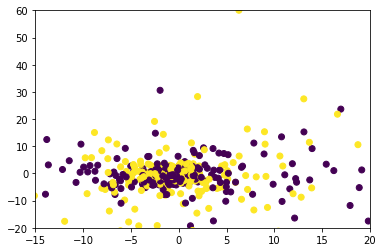

In [ ]:
y_pred = lr.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

# Get the min and max on the x-axis for plotting lines later
minX = pca[:, 0].min()
maxX = pca[:, 1].max()

# Plot the solution.
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.xlim(-15,20)
plt.ylim(-20,60)
plt.show()

In [ ]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=(0,1))
print(confusion)

[[60 38]
 [59 43]]


Function for a presentable confusion matrix

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Plotting a more presentable confusion matrix

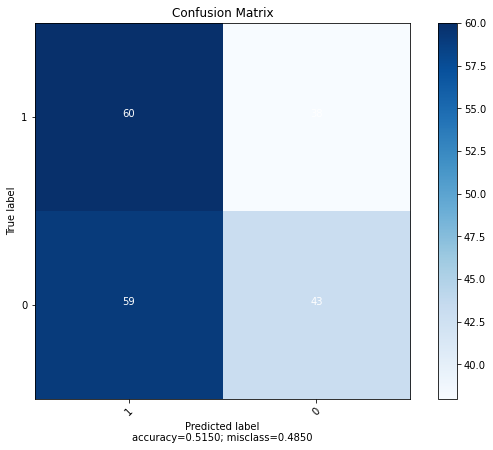

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = (1,0), title = 'Confusion Matrix',normalize=False)

Run a report on the Precision, Recall, and F1-score

In [ ]:
report = classification_report(y_test, predictions, target_names=('0','1'))
print(report)

              precision    recall  f1-score   support

           0       0.50      0.61      0.55        98
           1       0.53      0.42      0.47       102

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



Run five folds cross-validation with Logistic Regression algorithm.

In [ ]:
start = time.time()
#clf = LogisticRegression(solver='lbfgs')
clf = LogisticRegression()
cv_scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Time elapsed: 8.04 seconds.
Accuracy scores for the five folds:  [0.53125 0.5125  0.55    0.4875  0.5625 ]
Mean cross-validation score: 0.529


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Run KNN classifier with 1 nearest neighbors

In [ ]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=1)

# Fit model
neighbors.fit(X_train,y_train.values.ravel())
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

Time elapsed: 0.17 seconds.
accuracy score: 0.66


Run KNN classifier with 2 nearest neighbors

In [ ]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=2)

# Fit model
neighbors.fit(X_train,y_train.values.ravel())
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

Time elapsed: 0.16 seconds.
accuracy score: 0.615


Run KNN classifier with 3 nearest neighbors

In [ ]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=3)

# Fit model
neighbors.fit(X_train,y_train.values.ravel())
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

Time elapsed: 0.15 seconds.
accuracy score: 0.67


Run KNN classifier with 5 nearest neighbors

In [ ]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=5)

# Fit model
neighbors.fit(X_train,y_train.values.ravel())
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

Time elapsed: 0.15 seconds.
accuracy score: 0.635


Run KNN classifier with 10 nearest neighbors

In [ ]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=10)

# Fit model
neighbors.fit(X_train,y_train.values.ravel())
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

Time elapsed: 0.15 seconds.
accuracy score: 0.55


Running Random Forest Classifer with n_estimators=5

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=5, n_jobs=-1)

score = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

[0.6125 0.6125 0.625  0.5125 0.5625 0.55   0.6    0.5625 0.625  0.5625]

Cross-validation time elapsed: 5.35 seconds.
Average cross-validation score: 0.5825


Running Random Forest Classifer with n_estimators=10

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)

score = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

[0.6125 0.675  0.6625 0.625  0.6625 0.7    0.6125 0.675  0.65   0.6125]

Cross-validation time elapsed: 5.47 seconds.
Average cross-validation score: 0.6487


Running Random Forest Classifer with n_estimators=20

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=20, n_jobs=-1)

score = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

[0.725  0.75   0.7125 0.6125 0.5625 0.6375 0.575  0.6875 0.675  0.7375]

Cross-validation time elapsed: 7.84 seconds.
Average cross-validation score: 0.6675


Running Random Forest Classifer with n_estimators=40

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=40, n_jobs=-1)

score = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

[0.7    0.75   0.725  0.625  0.6625 0.7125 0.5875 0.6625 0.775  0.7   ]

Cross-validation time elapsed: 12.59 seconds.
Average cross-validation score: 0.69


Running Random Forest Classifier with n_estimators=10 and 100 cross-validations

In [ ]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)

score = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=100)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

[0.75  0.625 0.5   0.625 0.625 0.5   0.5   0.625 0.875 0.625 0.5   0.375
 0.5   0.875 0.625 0.875 0.625 0.5   0.75  0.625 0.625 0.875 0.5   0.75
 0.75  0.875 0.75  0.625 1.    0.5   0.75  0.625 0.625 0.75  0.75  0.75
 0.625 0.875 0.625 0.75  0.5   0.625 0.625 0.25  0.625 0.75  0.625 0.625
 0.25  0.5   0.875 0.75  0.625 0.75  0.75  0.75  0.375 0.375 0.375 0.625
 0.375 0.75  0.375 0.625 0.75  0.625 0.625 0.5   1.    0.375 0.625 0.375
 0.75  0.375 0.375 0.75  0.125 0.5   0.625 0.625 0.875 0.75  0.75  0.625
 0.5   0.75  0.75  0.375 0.5   0.75  0.5   1.    0.5   0.5   0.375 0.625
 0.625 0.75  0.75  0.75 ]

Cross-validation time elapsed: 54.99 seconds.
Average cross-validation score: 0.6262


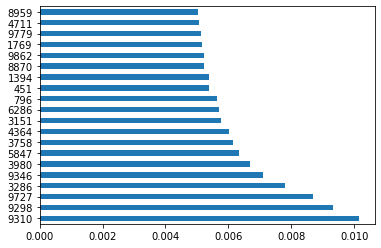

In [ ]:
rfc.fit(X_train, y_train.values.ravel())

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
svc = SVC()
svc.fit(X_train, y_train.values.ravel())
svc.score(X_test, y_test.values.ravel())

0.605

In [ ]:
start = time.time()

score = cross_val_score(svc, X_test, y_test.values.ravel(), cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),2)}')

[0.55 0.55 0.55 0.6  0.6  0.55 0.6  0.7  0.4  0.55]

Cross-validation time elapsed: 1.9 seconds.
Average cross-validation score: 0.56


Using Gradient Boosting Classifier

In [ ]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 680.3 seconds.
Accuracy score: 0.79.


Display a presentable confusion matrix of the results of Gradient Boosting Classifier

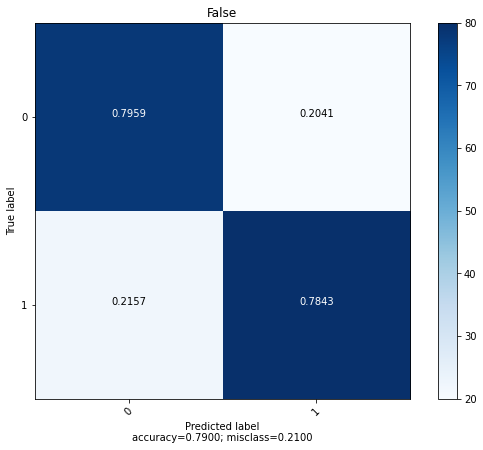

In [ ]:
cm = confusion_matrix(y_test.values.ravel(), predict_test)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
clf.score(X_test, y_test.values.ravel())

0.79

Using Gradient Boosting Classifier with n_estimators = 600

In [ ]:
start = time.time()

params = {'n_estimators': 600,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 808.67 seconds.
Accuracy score: 0.79.


Using Gradient Boosting Classifier with n_estimator = 700

In [ ]:
start = time.time()

params = {'n_estimators': 700,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 934.62 seconds.
Accuracy score: 0.785.


Using Gradient Boosting Classifier with max_depth = 3

In [ ]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 977.91 seconds.
Accuracy score: 0.8.


Using Gradient Boosting Classifier with max_depth = 4

In [ ]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 1278.26 seconds.
Accuracy score: 0.79.


In [ ]:
start = time.time()

params = {'n_estimators': 800,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 985.17 seconds.
Accuracy score: 0.78.


In [ ]:
start = time.time()

params = {'n_estimators': 900,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train.values.ravel())

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test.values.ravel()), 4)}.')

Time elapsed: 995.16 seconds.
Accuracy score: 0.79.
